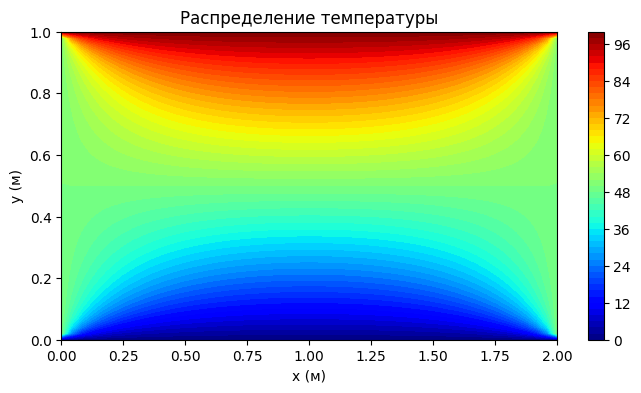

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Размеры пластины
width = 2.0
height = 1.0

# Количество точек сетки
nx, ny = 50, 50

# Размеры шагов
dx = width / (nx - 1)
dy = height / (ny - 1)

# Граничные условия
T_top = 100.0
T_bottom = 0.0
T_left = T_right = 50.0

# Инициализация температурного поля
T = np.zeros((ny, nx))

# Применение граничных условий
T[:, 0] = T_left
T[:, -1] = T_right
T[-1, :] = T_top
T[0, :] = T_bottom

# Итерационный процесс решения уравнения Лапласа
tolerance = 1e-6
max_iter = 10000

for _ in range(max_iter):
    T_old = T.copy()
    
    T[1:-1, 1:-1] = 0.25 * (T_old[1:-1, :-2] + T_old[1:-1, 2:] + T_old[:-2, 1:-1] + T_old[2:, 1:-1])
    
    # Проверка на сходимость
    if np.max(np.abs(T - T_old)) < tolerance:
        break

# Построение графика
x = np.linspace(0, width, nx)
y = np.linspace(0, height, ny)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(8, 4))
cp = plt.contourf(X, Y, T, levels=50, cmap='jet')  # Использование colormap 'jet' для схожего стиля
plt.colorbar(cp)
plt.title('Распределение температуры')
plt.xlabel('x (м)')
plt.ylabel('y (м)')
plt.show()